Here I seek to reproduce numerical results from "Radiation hydrodynamic theory of double ablation fronts in direct-drive inertial confinement fusion" from J. Sanz; R. Betti; V. A. Smalyuk; ... et. al.
Using a numerial Differential equation solver. I use the 4th order runge kutta method to solve and arbritrary differential equation whose structure is defined in f(u, vars)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# runge kutta 4th order 
def rk4(f, state0, t0, tend, N, vars):
  t = np.linspace(t0, tend, N+1) #t grid
  s = np.array((N+1)*[state0]) 
  dt = (tend-t0)/float(N) #stepsize
  for i in range(N):   # fourth order Runge Kutta Metdtod
    k0 = dt * f(s[i], vars)  # s[i] is our state at time t containing 3 values
    k1 = dt * f(s[i] + 0.5 * k0, vars)
    k2 = dt * f(s[i] + 0.5 * k1, vars)
    k3 = dt * f(s[i] + k2, vars)
    s[i+1] = s[i] + (k0 + 2*(k1 + k2) + k3) / 6.
  return t, s

# differential equations 10,11,12 from the rad hydro paper
def f(u, vars):
  Lsp, lp, Bo, deltat, lr = vars
  dTheta = (u[0]+u[1]-1)/(Lsp*u[0]**(5/2))
  dPhi = (deltat/(lp*Bo))*(u[0]**4-u[2]**4)  
  dThetaR = -3*deltat*u[1]*Bo/(4*u[0]**3*lr)
  return np.array([dTheta, dPhi, dThetaR])

In [5]:
# variables still incorrect (just testing simulation)
Lsp, lp, Bo, deltat, lr = 1,2,3,4,5
vars = Lsp, lp, Bo, deltat, lr

small = 0.01
Theta0, phi0, Thetar0 = .5,.5,.5
N, dt = 10**5, 10**(-5)

state0 =  np.array([Theta0, phi0, Thetar0])
t0, tend = 0., dt*N
t, s = rk4(f, state0, t0, tend, N, vars)

C:\Users\bowie\AppData\Local\Temp\ipykernel_29304\1436788471.py:17: RuntimeWarning: invalid value encountered in double_scalars
  dTheta = (u[0]+u[1]-1)/(Lsp*u[0]**(5/2))


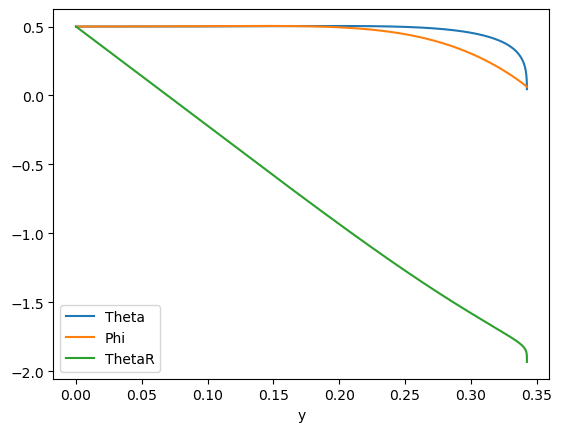

In [9]:
plt.plot(t, s[:,0])
plt.plot(t, s[:,1])
plt.plot(t, s[:,2])
plt.legend(['Theta', 'Phi', 'ThetaR'])
plt.xlabel('y')


plt.show()